In [1]:
pip install mtcnn

  Obtaining dependency information for mtcnn from https://files.pythonhosted.org/packages/dc/7e/0b2b688a9e2d353a661b617b12d00d9af29f877b57c8e4a3cbe447483b46/mtcnn-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.4.2 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for lz4>=4.3.3 from https://files.pythonhosted.org/packages/55/f9/69ed96043dae4d982286a4dda2feb473f49e95e4c90a928ec583d93769a2/lz4-4.3.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 660.6 kB/s eta 0:00:03
    --------------------------------------- 0.0/1.9 MB 660.6 kB/s eta 0:00:03
    --------------------------------------- 0.0/1.9 MB 279.3 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.9 MB 476.3 kB/s eta 0:00:04
   - --------

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
from facenet_pytorch import InceptionResnetV1, MTCNN

In [3]:
model = InceptionResnetV1(pretrained='vggface2').eval()

In [4]:
mtcnn = MTCNN(keep_all=True)

In [5]:
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [6]:
def detect_and_align_face(image):
    # Convertir l'image en RGB (comme attendu par MTCNN)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Utiliser MTCNN pour détecter les visages
    boxes, _ = mtcnn.detect(image_rgb)
    
    if boxes is None:
        print("Aucun visage détecté.")
        return None
    
    # Extraire les visages détectés
    faces = []
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        face = image_rgb[y1:y2, x1:x2]
        face_resized = cv2.resize(face, (160, 160))  # Redimensionner pour InceptionResnetV1
        face_normalized = face_resized.astype('float32') / 255.0  # Normalisation
        faces.append(face_normalized)
    
    return faces

In [7]:
def get_embedding(face_pixels):
    # Convertir l'image en tenseur PyTorch
    face_tensor = torch.tensor(face_pixels).permute(2, 0, 1).unsqueeze(0)
    
    # Passer le visage dans le modèle pour obtenir l'embedding
    with torch.no_grad():
        embedding = model(face_tensor)
    
    return embedding

In [8]:
def process_image(image_path):
    # Charger l'image
    image = cv2.imread(image_path)
    
    # Détecter et aligner les visages
    faces = detect_and_align_face(image)
    
    if faces is not None:
        for face in faces:
            # Afficher le visage détecté
            display_image(cv2.cvtColor((face * 255).astype(np.uint8), cv2.COLOR_RGB2BGR))
            
            # Obtenir l'embedding facial
            embedding = get_embedding(face)
            print("Embedding généré:", embedding.numpy())
    else:
        print("Aucun visage détecté ou aligné.")

In [9]:
image="C:/Users/mahen/Intranet/Modele_IA/images/profil_picture/selena_profile_picture.jpg"

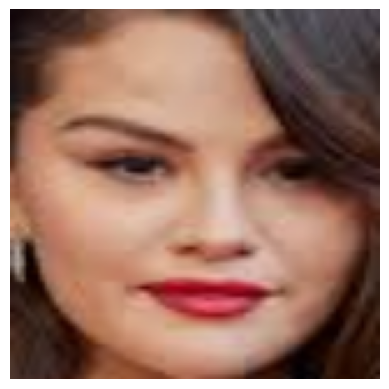

Embedding généré: [[ 8.14800188e-02  6.19636104e-02 -2.42491923e-02  4.76219505e-03
  -7.11793974e-02 -2.58166920e-02  1.29558938e-02  2.54251752e-02
   5.70808984e-02  5.09369783e-02  6.14691041e-02 -2.13806015e-02
   1.86028183e-02 -4.77050152e-03  1.67379773e-03 -5.01220115e-02
   1.06639728e-01 -8.82407185e-03  4.78216745e-02 -1.76927634e-02
   5.09969816e-02 -9.07745063e-02  4.91158590e-02 -1.55575108e-02
   1.42294336e-02 -3.69544365e-02 -4.31059347e-03 -8.21651146e-03
   1.03498464e-02 -1.91787779e-02 -2.50505749e-03 -4.68813069e-02
  -7.35479668e-02  4.28953255e-03  1.94358379e-02 -2.29072608e-02
  -3.78427170e-02 -4.70846659e-03 -2.99527397e-04  2.36213207e-04
  -9.61733749e-05 -4.85884622e-02 -7.05985576e-02  1.10134341e-01
  -5.24177551e-02  1.43068358e-02  2.81875450e-02  2.13190112e-02
   2.71886736e-02 -5.05674295e-02  3.60840745e-02 -7.98688829e-03
  -9.36577097e-03  3.12178750e-02  1.73983797e-02  3.11833783e-03
   2.01764181e-02 -3.59038487e-02 -6.45614788e-02  3.52054

In [10]:
process_image(image)

In [11]:
image2="C:/Users/mahen/Intranet/Modele_IA/images/profil_picture/selena_profile_picture2.jpg"

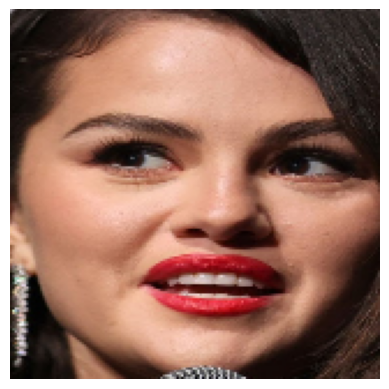

Embedding généré: [[ 0.03018765  0.05951843 -0.06379542 -0.01410239 -0.0244507  -0.06128011
   0.02057947  0.01703932  0.06103764  0.0151353   0.09638865 -0.01768997
   0.01321443 -0.08491611 -0.00492867 -0.02231886  0.05314464 -0.02370027
   0.02443674 -0.02217383  0.00218784 -0.07453417  0.01696953 -0.02493527
   0.01565822 -0.04274539  0.00903507 -0.0493763   0.02831216  0.01245725
  -0.01333138 -0.04762156 -0.04749867  0.02996057  0.02134431  0.05528434
   0.02522367 -0.02011889  0.00327146  0.02526764 -0.00150992 -0.07602381
  -0.01312081  0.05343681 -0.0555352   0.02053184 -0.02456261  0.02404786
   0.04162733 -0.03357787  0.07077392 -0.00341111 -0.01546677  0.08460766
   0.0311491  -0.01178804  0.00888887  0.01634497 -0.08126261  0.03977165
   0.00747146  0.0217301  -0.08028517  0.0001842   0.04338813 -0.05106983
   0.05387419  0.0129363   0.05962197 -0.02533068  0.0466442   0.00181744
  -0.0444358  -0.0691491   0.00996621 -0.06470791 -0.04584209 -0.00097915
  -0.01480251  0.125

In [12]:
process_image(image2)

In [13]:
images = "C:/Users/mahen/Intranet/Modele_IA/images/picture/selena_picture_1.jpg"

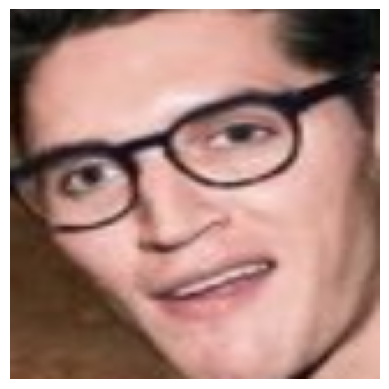

Embedding généré: [[-9.60994046e-03 -5.33069111e-02 -8.47109407e-02  1.46238841e-02
   4.41833287e-02  4.40534175e-04  2.99550518e-02  4.28708941e-02
   5.10159470e-02  1.80004723e-02 -7.32752606e-02 -1.38299987e-02
  -3.22157480e-02 -3.46509516e-02 -6.87806532e-02  3.17748673e-02
   6.95770979e-02  5.92059121e-02  3.54257338e-02 -2.52628978e-02
   4.42784838e-02  4.80054282e-02 -5.56180403e-02 -1.81292351e-02
  -1.45467818e-02  1.38837408e-04 -2.88539543e-03  6.49735704e-02
   8.76578763e-02 -5.57986135e-03  1.40726147e-03 -3.31878923e-02
   5.45854047e-02 -9.53062996e-02  3.15636955e-02 -2.85647437e-02
  -4.08788957e-03 -2.27533299e-02  2.53738370e-02 -5.36972508e-02
  -4.57896367e-02  4.91521694e-03 -8.82104412e-03 -5.57683408e-02
   4.71463520e-03 -4.42114994e-02 -9.41504911e-03 -3.73234823e-02
  -8.51061009e-03  6.62286803e-02  4.99986745e-02 -1.98387206e-02
   1.49978334e-02 -3.20751891e-02 -1.65874101e-02  2.15740167e-02
  -3.66699100e-02  1.54731013e-02  9.97662731e-03 -1.87491

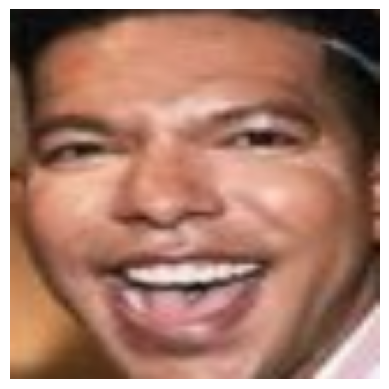

Embedding généré: [[ 0.05526386  0.00838239  0.01301793  0.0216301   0.04717311  0.0070109
  -0.01288508  0.00448517 -0.04009111 -0.0376088   0.04803761 -0.09799374
  -0.00317432 -0.01048457  0.04377543  0.00768812  0.02719259  0.03820908
   0.03407301  0.04741831  0.0595536   0.02477467  0.06282045 -0.01411206
  -0.00433655  0.05218853  0.04245736 -0.01163501  0.07345597  0.04304434
  -0.05062609  0.01271313 -0.05156882 -0.02090554  0.08494266 -0.00469189
   0.04459996 -0.028015    0.0515556   0.00130856 -0.01606587  0.09203844
   0.02529651 -0.0350579  -0.04508004 -0.04691812 -0.06031127  0.02852301
  -0.09448247  0.06371056 -0.04280936 -0.03733112 -0.01632059  0.01029405
  -0.04004479 -0.04769119  0.02803354  0.02133399  0.02462441  0.00764279
   0.08178572  0.03197763 -0.04829732 -0.0328328   0.01686996 -0.04511125
   0.02060715 -0.06546196  0.01875869  0.00448825 -0.05289837  0.05210106
  -0.05529864 -0.03414841  0.03968101 -0.0219184   0.03069811  0.01296172
  -0.01843951 -0.0153

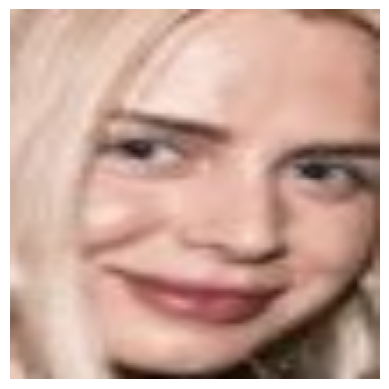

Embedding généré: [[ 3.08476556e-02  8.03754258e-04  4.55993339e-02 -1.33687695e-02
   1.88086834e-02 -6.62590191e-03 -4.24139574e-02 -2.45474782e-02
  -4.35901657e-02  1.13542154e-01 -3.26586105e-02 -4.07038396e-03
  -6.74582794e-02 -3.48389298e-02  7.05031231e-02 -5.87264560e-02
   2.22598724e-02  9.36785266e-02  8.01684742e-04  6.02406077e-02
  -7.81466346e-03  2.55166944e-02  1.58366910e-03  4.47430052e-02
  -3.33443023e-02  7.35200867e-02 -4.29659188e-02  4.06661853e-02
  -1.05251661e-02  3.97131953e-04 -6.29487783e-02 -4.78745205e-04
  -2.01832876e-02 -4.35256623e-02 -1.40544551e-03 -1.89620480e-02
  -5.55285960e-02  5.93859330e-03  4.68913540e-02  9.70785134e-03
  -5.50668798e-02  2.75916234e-02 -2.03907676e-02  2.43944861e-03
  -1.16034048e-02  3.43227945e-02  2.80278083e-02 -4.62092683e-02
   1.58551596e-02  5.08561358e-03 -6.01122621e-03 -1.56702902e-02
   4.72789668e-02  1.26197800e-01  1.29328100e-02 -2.63088252e-02
   3.83591466e-02  3.57659347e-02 -4.89780121e-02 -2.97184

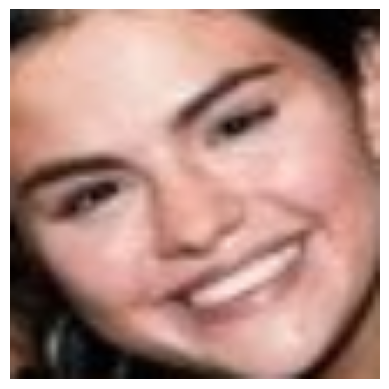

Embedding généré: [[ 1.51957218e-02  6.88245818e-02  3.49573530e-02 -8.29256792e-03
   2.13940497e-02 -4.89483140e-02  2.06389818e-02 -2.28316560e-02
   6.61559030e-02 -5.20156557e-03  9.46507528e-02 -3.39417122e-02
   1.19127920e-02  6.01387001e-04  2.47856062e-02 -2.82165818e-02
   8.51002783e-02  2.10071914e-02 -3.08420248e-02 -7.49278814e-03
   2.37634592e-02 -7.72815272e-02  6.52641505e-02  1.98315904e-02
  -5.31817600e-03 -6.82631135e-02  1.00798924e-02 -2.75758207e-02
   9.67994146e-03  1.14620877e-02 -2.74934247e-02  1.02195924e-03
  -5.58780283e-02 -5.77906473e-03  2.98750270e-02  6.35737777e-02
  -2.55184472e-02 -1.77783929e-02 -1.02013983e-02  4.08639871e-02
  -5.56421839e-02 -1.20735969e-02 -7.63544114e-03  1.18078059e-02
  -1.37839199e-03  1.79572254e-02  8.87478981e-03 -6.36232458e-03
   2.26455778e-02  8.29453953e-03  4.99690510e-02 -1.73662398e-02
   3.41932140e-02  1.53140649e-01  2.06851996e-02 -5.55082075e-02
   3.63898352e-02 -1.98926087e-02 -5.77937998e-02  2.21424

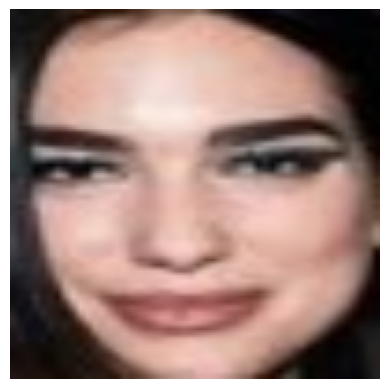

Embedding généré: [[ 0.06802253  0.00437239  0.03779559 -0.06568165  0.0373643   0.01379074
  -0.04960172  0.01959183  0.00570437 -0.07870832  0.04357039 -0.02915958
   0.03121437 -0.0287875  -0.00733278 -0.02035501  0.02866135  0.03263671
  -0.01233701 -0.0523094  -0.00627469 -0.03828111  0.06481638 -0.03410134
  -0.04591507 -0.04241261 -0.05484487 -0.032898   -0.01022963 -0.04043123
  -0.01905591 -0.0228394  -0.02797248 -0.12429457  0.08599744  0.05419888
   0.01930716 -0.06322827 -0.02988864 -0.00743754 -0.01612526  0.04835413
   0.00172038 -0.04396494  0.04301687 -0.02666477 -0.01940768  0.06972677
  -0.06824548 -0.03203351 -0.0415568  -0.0119071   0.00636267  0.0855235
   0.02048914  0.05562369  0.06630128 -0.01004229  0.0125287  -0.0177763
   0.04903084  0.02317706 -0.01046684  0.06323971 -0.00130569 -0.0190495
   0.04664922 -0.00769256  0.05996531  0.01131926 -0.00213307 -0.01871861
  -0.01125169 -0.0707037  -0.0135797  -0.10665425 -0.02002423 -0.01225744
   0.02484213  0.034376

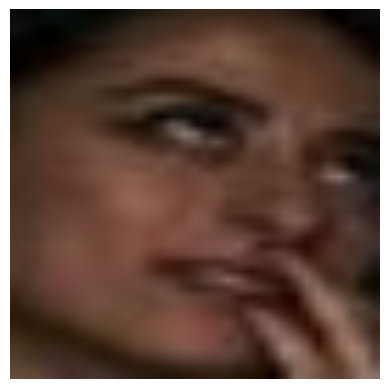

Embedding généré: [[-1.11272838e-02  4.31282856e-02  4.29219268e-02 -6.35539461e-03
  -3.49386111e-02  3.80809233e-02 -2.76717544e-02 -3.25312018e-02
  -2.92404853e-02  5.97156920e-02  3.46250297e-03  7.91749731e-03
   8.59679747e-03 -3.26998942e-02 -3.69903143e-03 -7.61301592e-02
   4.70877066e-02  1.19951377e-02  2.65747812e-02  6.89884368e-03
   2.19830312e-02 -1.11127682e-02  5.20510552e-03  3.37510221e-02
   2.51305313e-03  3.97637412e-02  2.58389637e-02 -3.29430327e-02
  -4.79154252e-02 -3.12709138e-02 -2.75606960e-02  2.54346412e-02
  -2.50075012e-02 -4.46693748e-02 -4.11390215e-02  4.86877840e-03
  -4.91435789e-02 -4.18916047e-02  3.62064391e-02 -7.24322023e-03
  -6.56542405e-02  1.00843580e-02 -7.85342790e-03 -2.94382814e-02
  -2.09531151e-02  4.30919677e-02  4.82547171e-02  5.72890230e-02
   2.02259421e-02 -2.62575839e-02  3.97471115e-02  8.48394781e-02
   3.96719575e-02  9.45041552e-02  5.84842749e-02 -1.67269986e-02
   4.75602150e-02  6.96153417e-02 -4.02132161e-02 -2.40905

In [14]:
process_image(images)

In [15]:
images2 = "C:/Users/mahen/Intranet/Modele_IA/images/picture/selena_picture_2.jpg"

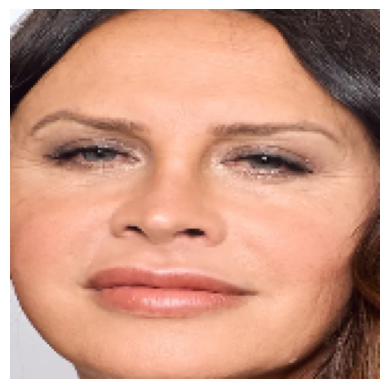

Embedding généré: [[-0.00056164  0.06736379 -0.03592087 -0.03380298 -0.01355536  0.03587876
   0.03411583 -0.00141099 -0.01213274  0.10764405 -0.09267534  0.1007506
  -0.05086851 -0.03598901  0.02318119  0.02476314  0.03601156 -0.00936815
   0.00200366 -0.00778142 -0.03784169  0.0169931  -0.0103279   0.04058752
   0.04087943 -0.00375658 -0.00291915  0.02715289 -0.02526893  0.02124231
   0.02284726 -0.04889851 -0.00419157  0.02698888 -0.03909323 -0.02097249
  -0.00029675  0.01043666  0.01097469  0.00301163 -0.01216765 -0.01758428
  -0.00092413  0.07792768  0.01541088  0.040884    0.04273576 -0.03434446
   0.06300072  0.01894969  0.01614041  0.03838171  0.02199851 -0.05392405
   0.00103727  0.0396193   0.00894002 -0.0154635  -0.05647181  0.02250585
  -0.03616685  0.03549884 -0.00016759 -0.02431285 -0.02887838 -0.0334599
  -0.07064609  0.05976669 -0.00127015  0.02114135  0.01123371  0.03818375
  -0.02637195 -0.00896189 -0.00432189  0.01320811 -0.09827279 -0.00453407
   0.01947585 -0.03446

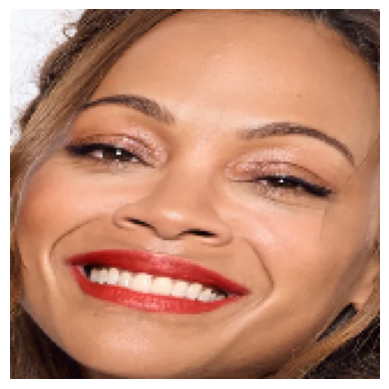

Embedding généré: [[-6.55705929e-02 -5.99955814e-03 -4.68744524e-02 -1.27300760e-02
   6.66787326e-02 -7.18936697e-02  9.67840850e-02 -3.37839313e-02
  -7.74881989e-02  9.17066913e-03  3.74515802e-02  1.70230176e-02
  -1.59486588e-02 -2.79075485e-02  5.13742268e-02  3.48643139e-02
  -3.22630703e-02  6.24003680e-03 -9.05606616e-03  2.36669369e-02
  -3.65516581e-02  3.63400914e-02 -4.39953394e-02 -6.73333043e-03
   4.12636548e-02 -3.16001214e-02  2.51966212e-02 -9.28035229e-02
   5.49802221e-02 -2.90742703e-02 -5.05708717e-02 -3.68700102e-02
   3.98760140e-02  6.42576590e-02  1.25767756e-02 -3.19622159e-02
   3.39949615e-02 -4.04087789e-02  2.08705906e-02 -8.13052803e-03
   1.52367214e-02 -7.19459355e-02 -1.37109570e-02 -1.04795136e-02
  -6.71334639e-02  4.93255407e-02  2.87334789e-02  2.45120972e-02
   5.09861670e-02  8.09482560e-02  2.76460573e-02  1.35803418e-02
  -7.84955025e-02 -8.37867334e-02  3.20208780e-02 -5.95560968e-02
  -5.18692918e-02  9.25994292e-03 -7.65937790e-02  1.44700

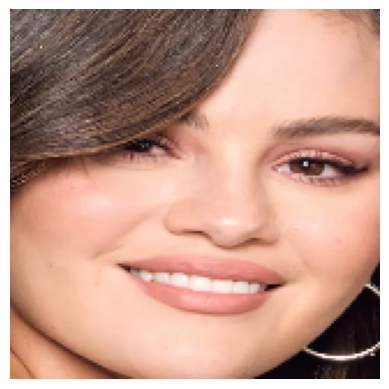

Embedding généré: [[ 1.61825269e-02  5.35820797e-02 -8.48627388e-02 -2.43430138e-02
   1.95276495e-02 -5.92036434e-02  6.36667311e-02  3.74632925e-02
   2.96509489e-02 -5.20176766e-03  5.21280318e-02 -2.74103060e-02
  -3.16164158e-02 -8.60542431e-02  5.69778569e-02 -1.54356901e-02
   6.84426799e-02 -7.34782021e-04  1.34178018e-02 -2.54715048e-02
   2.30793934e-02 -6.69444427e-02 -2.94144847e-03 -9.66617092e-03
   1.45442812e-02 -5.20272031e-02  8.29944387e-03 -3.84911261e-02
   3.33534926e-02 -1.51928421e-02 -5.10050505e-02 -8.15643966e-02
  -6.20156564e-02  2.81391223e-03  6.27481565e-03  4.59496789e-02
  -1.90412125e-03 -2.92641986e-02  3.00796274e-02 -8.01868364e-03
   2.91655455e-02 -7.36174062e-02 -4.66929972e-02 -1.31314585e-03
  -3.44389975e-02  5.96881174e-02 -2.14081164e-02  9.65326466e-03
   3.32019180e-02 -2.28807945e-02  6.55745491e-02 -1.11712292e-02
  -3.24813686e-02  3.60648818e-02  1.26837613e-02 -3.57454680e-02
   2.34620292e-02 -3.24261487e-02 -4.19952199e-02  3.94486

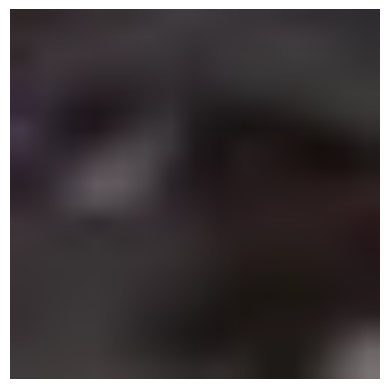

Embedding généré: [[ 0.00738392 -0.02735171 -0.07841676  0.02215092 -0.02183931  0.034867
  -0.0592898   0.03788682 -0.03100855  0.048161    0.07754467  0.07570659
   0.05101292 -0.03662588  0.01844076 -0.0534274   0.02096293  0.05699573
  -0.01210019 -0.0285385  -0.06097899  0.01161761  0.09251465 -0.075555
  -0.01510171 -0.02273663 -0.01442372 -0.02692026 -0.02901929 -0.00402374
   0.0007116   0.04440946 -0.00227259  0.01188709 -0.00779711 -0.01198093
   0.00063929 -0.02991411 -0.06638317  0.04307018 -0.01759693 -0.0143572
  -0.0153505   0.00767495  0.02946731  0.03026182  0.05506494  0.00766031
  -0.0819922  -0.05338789 -0.00922902 -0.05493097  0.03091034  0.02212563
  -0.06448011  0.03865516 -0.04626909  0.07570057 -0.05004035 -0.00507451
  -0.02633297  0.09249082 -0.11749341 -0.00374938  0.0012116   0.03710324
   0.03564119 -0.06050226  0.00046806  0.00052234  0.08365452  0.03570919
  -0.04466782  0.00360772 -0.00899833 -0.05361338 -0.04932492 -0.0059453
   0.01300464 -0.00179363 

In [17]:
process_image(images2)

In [4]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [7]:
def load_image(image_path):
    # Charger l'image
    image = cv2.imread(image_path)
    # Convertir en RGB pour MTCNN
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, rgb_image

In [8]:
def detect_faces_mtcnn(rgb_image):
    # Initialiser le détecteur MTCNN
    detector = MTCNN()
    # Détecter les visages dans l'image
    faces = detector.detect_faces(rgb_image)
    return faces

In [9]:
def draw_faces_mtcnn(image, faces):
    # Dessiner des rectangles et les landmarks
    for face in faces:
        x, y, width, height = face['box']  # Boîte englobante
        keypoints = face['keypoints']  # Points de repère
        
        # Dessiner le rectangle autour du visage
        cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)
        
        # Dessiner les points de repère (landmarks)
        cv2.circle(image, (keypoints['left_eye']), 2, (0, 255, 0), 2)
        cv2.circle(image, (keypoints['right_eye']), 2, (0, 255, 0), 2)
        cv2.circle(image, (keypoints['nose']), 2, (0, 255, 0), 2)
        cv2.circle(image, (keypoints['mouth_left']), 2, (0, 255, 0), 2)
        cv2.circle(image, (keypoints['mouth_right']), 2, (0, 255, 0), 2)

    return image

In [10]:
def display_image(image):
    # Afficher l'image avec matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [11]:
def process_image_mtcnn(image_path):
    # Charger l'image
    image, rgb_image = load_image(image_path)
    
    # Détecter les visages avec MTCNN
    faces = detect_faces_mtcnn(rgb_image)
    
    if len(faces) == 0:
        print("Aucun visage détecté.")
        return
    
    # Dessiner les visages détectés et les landmarks
    image_with_faces = draw_faces_mtcnn(image, faces)
    
    # Afficher l'image résultante
    display_image(image_with_faces)

In [12]:
image = "C:/Users/mahen/Intranet/Modele_IA/images/profil_picture/selena_profile_picture.jpg"

In [13]:
images = "C:/Users/mahen/Intranet/Modele_IA/images/picture/selena_picture_1.jpg"

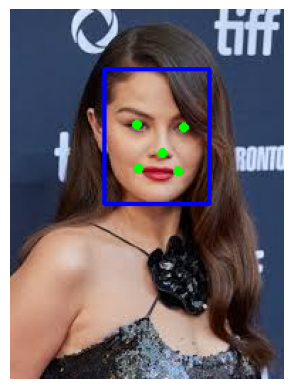

In [14]:
process_image_mtcnn(image)

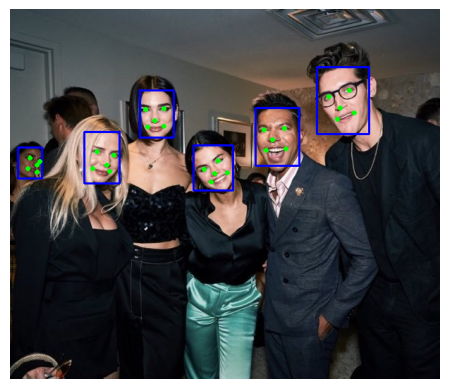

In [15]:
process_image_mtcnn(images)